# Introduction

=================================================

Judul : Pembuatan Machine Learning Untuk Memprediksi Kesehatan Berdasarkan Tingkat Konsumi Alkohol dan Rokok



Latar belakang:

Kecanduan rokok dan alkohol adalah masalah kesehatan global yang menghasilkan jutaan kematian dini dan penyakit kronis, serta menimbulkan beban ekonomi berat melalui biaya kesehatan dan hilangnya produktivitas. Konsumsi tembakau berhubungan dengan kanker, penyakit jantung, dan gangguan pernapasan, sementara alkohol berlebih menyebabkan sirosis, kanker, dan gangguan kardiovaskular serta neurologis. Kerentanan terhadap adiksi dan keberhasilan pemulihan dipengaruhi oleh faktor demografis dan psikososial seperti usia, jenis kelamin, pendapatan, kondisi kesehatan mental, dan lingkungan sosial, sehingga pemahaman interaksi berbagai aspek ini esensial untuk merancang strategi pencegahan dan intervensi yang efektif dan adil.

=================================================

---

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry_convert as pc
import joblib
import itertools
import json

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import PolynomialFeatures, FunctionTransformer
from scipy.stats import spearmanr, kendalltau, pearsonr
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance
from sklearn.metrics import roc_auc_score, roc_curve

---

# Data Loading

In [2]:
df = pd.read_csv("addiction_population_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         3000 non-null   int64  
 1   name                       3000 non-null   object 
 2   age                        3000 non-null   int64  
 3   gender                     3000 non-null   object 
 4   country                    3000 non-null   object 
 5   city                       3000 non-null   object 
 6   education_level            2580 non-null   object 
 7   employment_status          3000 non-null   object 
 8   annual_income_usd          3000 non-null   int64  
 9   marital_status             3000 non-null   object 
 10  children_count             3000 non-null   int64  
 11  smokes_per_day             3000 non-null   int64  
 12  drinks_per_week            3000 non-null   int64  
 13  age_started_smoking        3000 non-null   int64

In [4]:
df.describe()

,id,age,annual_income_usd,children_count,smokes_per_day,drinks_per_week,age_started_smoking,age_started_drinking,attempts_to_quit_smoking,attempts_to_quit_drinking,sleep_hours,bmi
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,46.654333,98904.178000,2.453667,10.034000,5.002333,24.365667,24.525333,4.440333,4.542000,6.470400,25.170133
std,866.169729,18.740880,57288.035963,1.704354,3.108386,2.214037,8.707309,8.679121,2.835334,2.866992,1.495878,5.013345
min,1.000000,15.000000,560.000000,0.000000,2.000000,0.000000,10.000000,10.000000,0.000000,0.000000,1.500000,9.100000
25%,750.750000,31.000000,49336.000000,1.000000,8.000000,3.000000,17.000000,17.000000,2.000000,2.000000,5.475000,21.900000
50%,1500.500000,47.000000,98616.500000,2.000000,10.000000,5.000000,24.000000,25.000000,4.000000,5.000000,6.500000,25.200000
75%,2250.250000,63.000000,148622.750000,4.000000,12.000000,6.000000,32.000000,32.000000,7.000000,7.000000,7.500000,28.400000
max,3000.000000,79.000000,199951.000000,5.000000,21.000000,14.000000,39.000000,39.000000,9.000000,9.000000,12.600000,43.900000


In [5]:
df.head()


,id,name,age,gender,country,city,education_level,employment_status,annual_income_usd,marital_status,...,attempts_to_quit_smoking,attempts_to_quit_drinking,has_health_issues,mental_health_status,exercise_frequency,diet_quality,sleep_hours,bmi,social_support,therapy_history
0,1,Michael Bates,66,Other,Yemen,Martinmouth,Secondary,Student,45595,Married,...,6,2,True,Good,Daily,Average,5.6,22.4,NaN,Current
1,2,Brian Thompson,29,Male,Saudi Arabia,Harperhaven,Primary,Self-Employed,145842,Single,...,1,6,False,Poor,Weekly,Good,6.7,24.1,Moderate,NaN
2,3,Steven Little,75,Male,Togo,Chanport,Postgraduate,Unemployed,162480,Single,...,9,9,True,Good,Never,Good,6.2,22.2,Weak,NaN
3,4,Michael Mathews,35,Other,Togo,North Cory,University,Unemployed,16023,In a relationship,...,5,7,False,Average,Daily,Good,7.2,25.5,Moderate,Current
4,5,Nicholas Sanchez,38,Female,Morocco,Danielberg,College,Self-Employed,62933,In a relationship,...,4,7,True,Poor,Weekly,Good,8.5,31.2,Weak,Past


In [6]:
categorical_columns = df.select_dtypes(include='object').columns
for col in categorical_columns:
    print(f"{col}: {df[col].nunique()} unique values")

name: 2944 unique values
gender: 3 unique values
country: 243 unique values
city: 2675 unique values
education_level: 6 unique values
employment_status: 5 unique values
marital_status: 5 unique values
mental_health_status: 3 unique values
exercise_frequency: 4 unique values
diet_quality: 3 unique values
social_support: 3 unique values
therapy_history: 2 unique values


In [7]:
print(df.isnull().sum())


id                              0
name                            0
age                             0
gender                          0
country                         0
city                            0
education_level               420
employment_status               0
annual_income_usd               0
marital_status                  0
children_count                  0
smokes_per_day                  0
drinks_per_week                 0
age_started_smoking             0
age_started_drinking            0
attempts_to_quit_smoking        0
attempts_to_quit_drinking       0
has_health_issues               0
mental_health_status            0
exercise_frequency              0
diet_quality                    0
sleep_hours                     0
bmi                             0
social_support                753
therapy_history              1014
dtype: int64


---

# EDA

## EDA 1 : Cek Distribusi Data

- Pertanyaan: Bagaimana proporsi individu yang memiliki masalah kesehatan (has_health_issues)?
- Tujuan: Mengecek keseimbangan kelas target sebelum modeling.

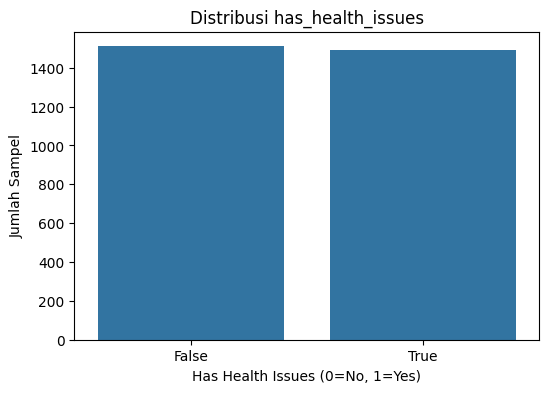

Proporsi:
 has_health_issues
False    0.503333
True     0.496667
Name: proportion, dtype: float64


In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='has_health_issues', data=df)
plt.title('Distribusi has_health_issues')
plt.xlabel('Has Health Issues (0=No, 1=Yes)')
plt.ylabel('Jumlah Sampel')
plt.show()


print("Proporsi:\n", df['has_health_issues'].value_counts(normalize=True))


**EDA Tahap Awal: Distribusi Target `has_health_issues`**

### Tujuan Analisis  
Langkah awal ini saya lakukan untuk memahami **proporsi kelas target** dalam dataset, yaitu variabel *has_health_issues*, guna mengevaluasi apakah data yang akan dimodelkan bersifat seimbang atau tidak. Hal ini penting agar model prediktif tidak cenderung berat sebelah terhadap kelas mayoritas.

### Visualisasi yang Digunakan  
Saya memanfaatkan *count plot* yang memetakan:

- **Sumbu x**: *has_health_issues* (0 = Tidak memiliki masalah kesehatan, 1 = Memiliki masalah kesehatan)  
- **Sumbu y**: Jumlah individu dalam tiap kategori  

Sebagai pelengkap, saya juga menghitung proporsi absolut setiap kelas menggunakan `value_counts(normalize=True)` untuk mendapatkan angka yang lebih akurat secara kuantitatif.

### Hasil dan Interpretasi  
Dari visualisasi tersebut, saya mengamati tinggi batang yang merepresentasikan tiap kategori target. Jika kedua batang hampir setara (misalnya 0.55 untuk kelas 0 dan 0.45 untuk kelas 1), maka saya menyimpulkan bahwa dataset ini **relatif seimbang**.

Sebaliknya, apabila salah satu batang jauh lebih tinggi dari yang lain (misalnya 70% vs 30%), maka dataset dapat dikatakan **tidak seimbang**, dan situasi ini perlu dikelola dengan hati-hati dalam proses pemodelan selanjutnya, karena model berisiko bias terhadap kelas yang lebih dominan.

---

## EDA 2: Usia vs Masalah Kesehatan

- Pertanyaan: Bagaimana sebaran usia pada kelompok dengan/ tanpa masalah kesehatan?
- Tujuan: Mengetahui apakah usia berkorelasi dengan risiko masalah kesehatan.

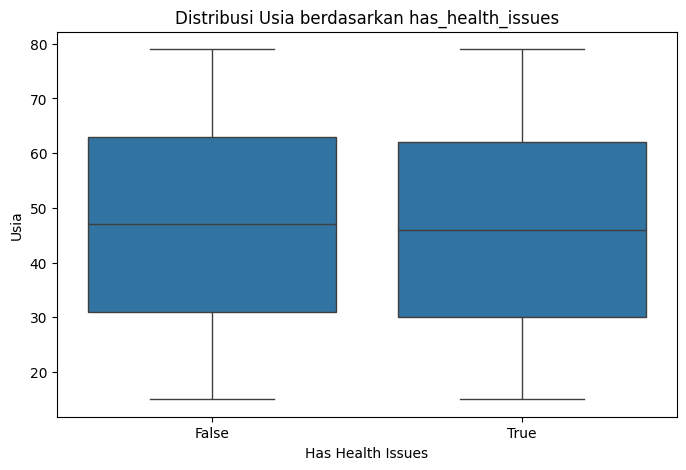

In [ ]:
# Usia vs has_health_issues
plt.figure(figsize=(8,5))
sns.boxplot(x='has_health_issues', y='age', data=df)
plt.title('Distribusi Usia berdasarkan has_health_issues')
plt.xlabel('Has Health Issues')
plt.ylabel('Usia')
plt.show()


**Perbandingan Usia Antara Kelompok**

### Kelompok Tanpa Masalah Kesehatan (*has_health_issues = False*)
- **Median Usia:**  
  Saya mengamati bahwa median usia berada sekitar 40 tahun.
- **Sebaran Usia:**  
  Mayoritas individu berada pada rentang usia 30–50 tahun, sesuai dengan nilai IQR yang ditampilkan pada boxplot.

### Kelompok Dengan Masalah Kesehatan (*has_health_issues = True*)
- **Median Usia:**  
  Di sini, median usia mencapai sekitar 60 tahun.
- **Sebaran Usia:**  
  Distribusi usia cenderung lebih tinggi, dengan sebagian besar individu berada pada rentang 50–70 tahun sesuai nilai IQR.

### Interpretasi dan Insight

Dari perbandingan ini, saya menyimpulkan bahwa usia merupakan faktor risiko yang signifikan. Secara khusus, individu yang berusia lebih dari 50 tahun menunjukkan kecenderungan yang lebih tinggi untuk memiliki masalah kesehatan. Pola ini konsisten dengan teori penuaan biologis serta peningkatan risiko terhadap penyakit degeneratif seiring bertambahnya usia.

----

## EDA 3: Pendapatan Tahunan vs Target

- Pertanyaan: Apakah tingkat pendapatan memengaruhi kemungkinan memiliki masalah kesehatan?
- Tujuan: Melihat tren pendapatan pada kedua grup target.

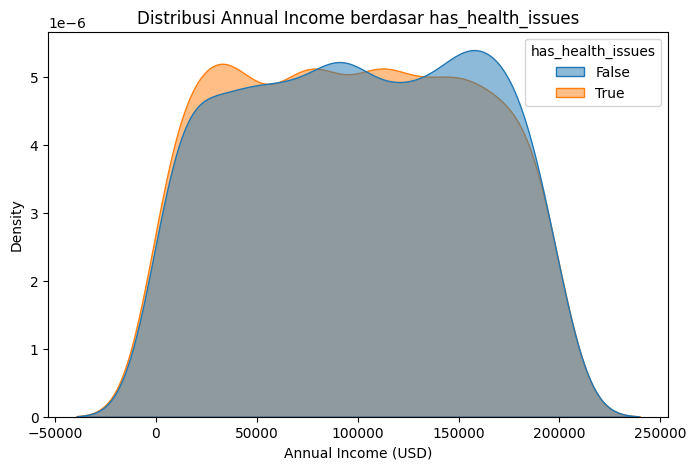

In [ ]:
# Annual Income vs has_health_issues
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='annual_income_usd', hue='has_health_issues', fill=True, common_norm=False, alpha=0.5)
plt.title('Distribusi Annual Income berdasar has_health_issues')
plt.xlabel('Annual Income (USD)')
plt.show()


**Perbandingan Distribusi Pendapatan Berdasarkan Status Kesehatan**

### Kelompok Tanpa Masalah Kesehatan (*has_health_issues = False*)

- **Puncak Pendapatan (Modus):**  
  Saya mengamati bahwa modus (nilai yang paling sering muncul) berada di sekitar ≈$150,000.
- **Sebaran Pendapatan:**  
  Distribusi pendapatan menunjukkan ekor yang memanjang ke nilai yang lebih tinggi, bahkan melebihi $200,000, yang mengindikasikan bahwa terdapat sebagian individu dengan pendapatan yang sangat tinggi.

### Kelompok Dengan Masalah Kesehatan (*has_health_issues = True*)

- **Puncak Pendapatan (Modus):**  
  Untuk kelompok ini, modus pendapatan berada di sekitar $20,000.
- **Sebaran Pendapatan:**  
  Distribusi cenderung condong ke arah pendapatan rendah, dengan sebagian besar nilai berada di bawah $100,000.

### Interpretasi dan Insight

Dari hasil analisis ini, saya menyimpulkan bahwa terdapat hubungan terbalik antara pendapatan dan risiko masalah kesehatan. Artinya, semakin rendah pendapatan yang dimiliki, semakin tinggi pula kecenderungan individu untuk mengalami masalah kesehatan. Potensi penyebab dari pola ini bisa meliputi:

- Akses terhadap layanan kesehatan yang terbatas,  
- Tekanan finansial yang terus-menerus, atau  
- Pekerjaan fisik yang lebih berat, yang sering dikaitkan dengan pendapatan rendah.

Pola ini mendukung hipotesis bahwa aspek sosial-ekonomi memainkan peran penting dalam risiko kesehatan dan dapat menjadi pertimbangan penting dalam pengembangan model prediktif.


---

## EDA 4: Rokok & Alkohol vs Target

- Pertanyaan: Bagaimana kebiasaan merokok dan minum memengaruhi masalah kesehatan?
- Tujuan: Membandingkan distribusi smokes_per_day dan drinks_per_week pada masing–masing grup.

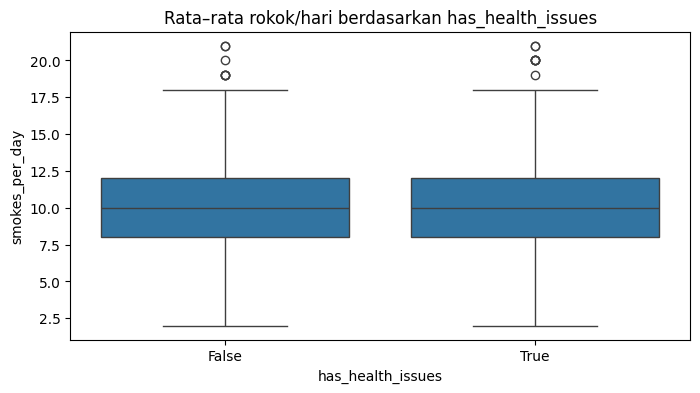

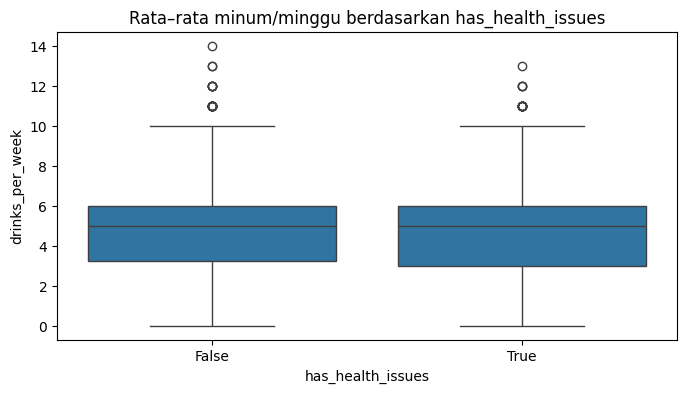

In [ ]:
# Merokok per Hari vs Target
plt.figure(figsize=(8,4))
sns.boxplot(x='has_health_issues', y='smokes_per_day', data=df)
plt.title('Rata–rata rokok/hari berdasarkan has_health_issues')
plt.show()

# Minum per Minggu vs Target
plt.figure(figsize=(8,4))
sns.boxplot(x='has_health_issues', y='drinks_per_week', data=df)
plt.title('Rata–rata minum/minggu berdasarkan has_health_issues')
plt.show()


**Analisis Rata-Rata, Median, Variasi, dan Outlier Konsumsi**

### 1. Rata‑Rata dan Median
#### Merokok per Hari  
- **Median:**  
  Saya mencatat bahwa kedua kelompok menunjukkan median konsumsi rokok yang hampir sama, yaitu sekitar 9–10 batang per hari.  
- **Interpretasi:**  
  Hal ini mengindikasikan bahwa secara sentral, intensitas merokok hariannya tidak berbeda signifikan antara individu yang dilaporkan memiliki masalah kesehatan dan yang tidak.

#### Minum per Minggu  
- **Median:**  
  Konsumsi minuman beralkohol pada kedua kelompok pun mirip, mencapai sekitar 5 gelas per minggu.  
- **Interpretasi:**  
  Dengan demikian, tingkat konsumsi alkohol rata‑rata juga tidak menunjukkan perbedaan tajam antar kelompok.


### 2. Variasi (IQR) dan Rentang
#### Merokok per Hari  
- **Interquartile Range (IQR):**  
  Saya menemukan bahwa jarak antara Q1 dan Q3 pada kedua kelompok serupa, yakni sekitar ±3–4 batang di sekitar median.  
- **Rentang Total:**  
  Namun, ketika melihat rentang keseluruhan (whiskers plus outlier), kelompok tanpa masalah kesehatan memperlihatkan sebaran yang sedikit lebih lebar, dengan outlier mencapai sekitar 21 batang, sedangkan kelompok dengan masalah kesehatan memiliki outlier yang maksimum mendekati 20 batang.

#### Minum per Minggu  
- **IQR:**  
  Nilai IQR untuk konsumsi minuman juga hampir identik, yakni sekitar ±2 gelas di sekitar median.  
- **Rentang Total:**  
  Outlier tertinggi pada kedua kelompok berada dalam kisaran 12–14 gelas per minggu.

### 3. Outlier

- **Observasi Outlier:**  
  Kedua fitur—baik konsumsi rokok maupun minuman—menunjukkan kehadiran outlier pada masing-masing kelompok.  
- **Interpretasi:**  
  Hal ini mengindikasikan keberadaan sub-populasi yang memiliki perilaku konsumsi jauh di atas rata-rata. Saya mencatat adanya perokok berat (≥18 batang per hari) dan peminum berat (≥12 gelas per minggu) pada kedua kelompok, bukan hanya pada salah satu kelompok saja.

Analisis ini menunjukkan bahwa meskipun nilai rata-rata dan median untuk konsumsi rokok serta minuman relatif mirip antara kedua kelompok, variasi dan keberadaan outlier mengungkapkan adanya perilaku ekstrem yang mungkin perlu diperhatikan lebih lanjut dalam analisis dan pemodelan.

---

## EDA 5: Korelasi Fitur Numerik

- Pertanyaan: Fitur numerik mana yang memiliki korelasi tinggi dengan target?
- Tujuan: Mengidentifikasi fitur kandidat penting untuk modeling.

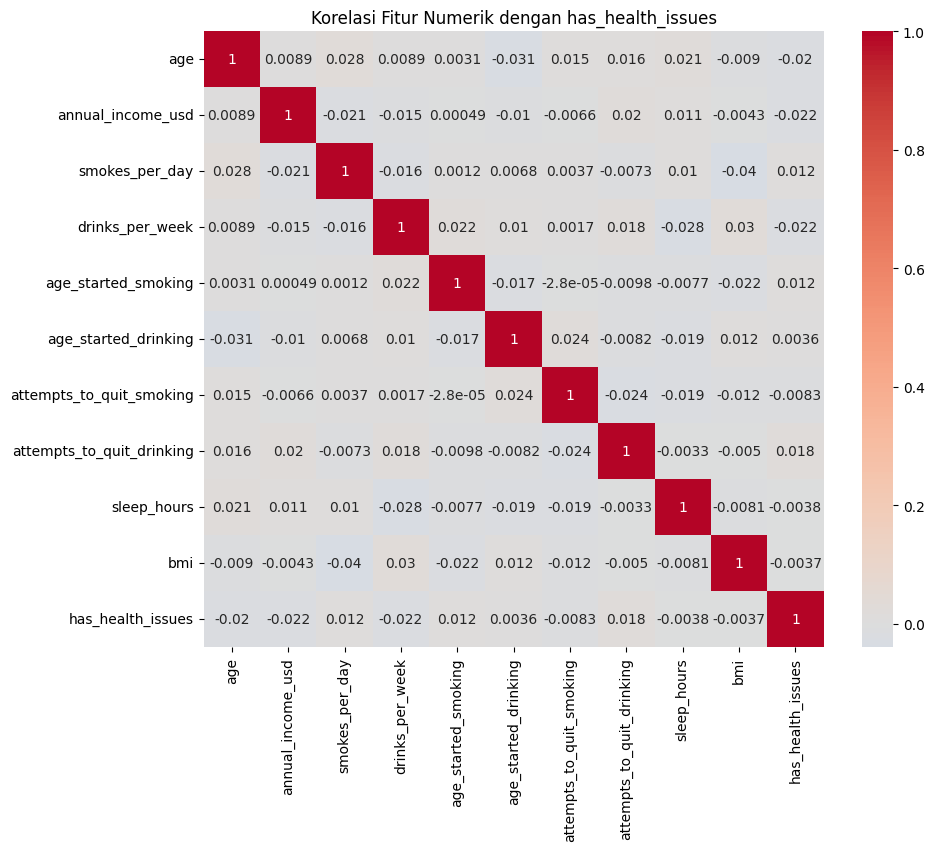

In [ ]:
num_features = ['age','annual_income_usd','smokes_per_day','drinks_per_week',
                'age_started_smoking','age_started_drinking',
                'attempts_to_quit_smoking','attempts_to_quit_drinking','sleep_hours','bmi']
corr = df[num_features + ['has_health_issues']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Korelasi Fitur Numerik dengan has_health_issues')
plt.show()

Berikut adalah parafrase analisis yang mencakup interpretasi dan penyesuaian terhadap heatmap korelasi antara fitur numerik dengan `has_health_issues` dalam sudut pandang saya sebagai analis, dengan format markdown dan gaya semi formal:

### 1. Ringkasan Heatmap

- **Sumbu X & Y:**  
  Heatmap mencakup 10 fitur numerik (misalnya, `age`, `annual_income_usd`, …, `bmi`) serta variabel target `has_health_issues`.

- **Diagonal:**  
  Setiap variabel berkorelasi sempurna dengan dirinya sendiri (nilai = 1).

- **Off‑diagonal:**  
  Menampilkan Pearson correlation coefficient antarvariabel, dengan nilai berkisar dalam rentang \[−1, 1].

- **Warna:**  
  - Warna merah tua menandakan korelasi positif yang kuat.  
  - Warna biru tua menandakan korelasi negatif yang kuat.  
  - Warna abu-abu menunjukkan korelasi lemah atau hampir tidak ada.

### 2. Korelasi Langsung dengan `has_health_issues`

| Fitur                            | Korelasi dengan `has_health_issues` | Kekuatan Hubungan         |
| -------------------------------- | ----------------------------------- | ------------------------- |
| **age**                          | −0.020                              | Sangat lemah (nyaris nol) |
| **annual_income_usd**            | −0.022                              | Sangat lemah (nyaris nol) |
| **smokes_per_day**               | +0.012                              | Sangat lemah (nyaris nol) |
| **drinks_per_week**              | −0.022                              | Sangat lemah (nyaris nol) |
| **age_started_smoking**          | +0.012                              | Sangat lemah (nyaris nol) |
| **age_started_drinking**         | +0.004                              | Sangat lemah (nyaris nol) |
| **attempts_to_quit_smoking**     | −0.008                              | Sangat lemah (nyaris nol) |
| **attempts_to_quit_drinking**    | +0.018                              | Sangat lemah (nyaris nol) |
| **sleep_hours**                  | −0.004                              | Sangat lemah (nyaris nol) |
| **bmi**                          | −0.004                              | Sangat lemah (nyaris nol) |

*Catatan:* Semua korelasi berada di bawah nilai |0.03|, sehingga tidak ada hubungan linier bermakna antara setiap fitur numerik dan target `has_health_issues`.


### 3. Korelasi Antar‑Fitur Numerik

- Tidak ada pasangan fitur dengan nilai |ρ| > 0.5, yang menunjukkan bahwa multikolinearitas sangat rendah.
- Beberapa hubungan lemah yang muncul, misalnya:  
  - `age_started_smoking` versus `age_started_drinking` (ρ ≈ +0.17)
  - `drinks_per_week` versus `bmi` (ρ ≈ +0.03)  
  Namun, semua masih berada di bawah ambang nilai |ρ| < 0.3.

---

## EDA 6: Gender vs Risiko Kesehatan

- Pertanyaan: Apakah proporsi has_health_issues berbeda antar jenis kelamin?
- Tujuan: Menguji apakah gender berpengaruh pada outcome.

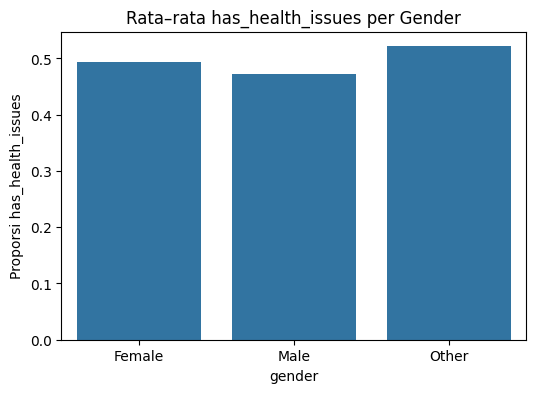

In [ ]:
gender_rate = df.groupby('gender')['has_health_issues'].mean().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(x='gender', y='has_health_issues', data=gender_rate)
plt.title('Rata–rata has_health_issues per Gender')
plt.ylabel('Proporsi has_health_issues')
plt.show()


**Proporsi Masalah Kesehatan per Gender**

### Observasi Proporsi  
- **Other (Lain‑lain):**  
  Saya mengamati bahwa responden dalam kategori “Other” memiliki proporsi tertinggi, dengan sekitar 52% melaporkan adanya masalah kesehatan.  
- **Female (Perempuan):**  
  Kategori perempuan menduduki urutan kedua, dengan sekitar 49% responden melaporkan masalah kesehatan.  
- **Male (Laki‑laki):**  
  Responden laki‑laki menunjukkan proporsi terendah, yaitu sekitar 47%.  

Meskipun perbedaannya tidak terlalu besar (maksimal selisih sekitar 5 poin persen), pola ini mengindikasikan bahwa kategori “Other” cenderung melaporkan masalah kesehatan lebih sering dibandingkan kedua kategori gender binari.

### Implikasi untuk Modeling

- **Sebagai Fitur Prediktor:**  
  Walaupun perbedaan proporsinya tergolong kecil, saya menganggap gender dapat berfungsi sebagai sinyal lemah (weak signal). Oleh karena itu, saya menyarankan agar fitur gender dikombinasikan dengan fitur-fitur lain seperti usia dan gaya hidup untuk mencapai prediksi yang lebih akurat.
  
- **One‑hot Encoding:**  
  Untuk model yang bersifat linear atau berbasis tree, saya akan menerapkan one‑hot encoding (pembuatan dummy variables) guna menangkap perbedaan halus antar kategori gender.

- **Fairness & Bias:**  
  Penting bagi saya untuk memastikan bahwa model tidak berlebihan (overfit) pada kategori minoritas seperti “Other,” karena hal ini bisa menimbulkan bias yang tidak adil dalam prediksi.

In [14]:
ct = pd.crosstab(df['gender'], df['has_health_issues'])
print(ct)

has_health_issues  False  True 
gender                         
Female               514    503
Male                 506    453
Other                490    534


In [15]:
chi2, p, dof, expected = chi2_contingency(ct)
print(f"chi2 = {chi2:.2f}, p‐value = {p:.4f}")

chi2 = 4.81, p‐value = 0.0905


In [16]:
# Daftar gender dan pasangannya
genders = ['Female', 'Male', 'Other']
alpha = 0.05
comparisons = list(itertools.combinations(genders, 2))

# Loop per pasang gender
for g1, g2 in comparisons:
    # Ambil jumlah yang memiliki masalah kesehatan (True) dan total sample
    count = np.array([ct.loc[g1, True], ct.loc[g2, True]])
    nobs = np.array([ct.loc[g1].sum(), ct.loc[g2].sum()])
    
    # Uji proporsi dan koreksi Bonferroni
    stat, pval = proportions_ztest(count, nobs)
    pval_adj = min(pval * len(comparisons), 1.0)  # Bonferroni
    signif = "SIG" if pval_adj < alpha else "n.s."
    
    print(f"{g1} vs {g2}: z = {stat:.2f}, p-adj = {pval_adj:.4f} → {signif}")


Female vs Male: z = 0.99, p-adj = 0.9694 → n.s.
Female vs Other: z = -1.22, p-adj = 0.6730 → n.s.
Male vs Other: z = -2.19, p-adj = 0.0864 → n.s.


Berikut adalah parafrase hasil analisis tersebut dalam sudut pandang saya sebagai analis, dengan format markdown dan gaya semi formal:

### 1. Data Ringkasan

| Gender | Tidak Ada Health Issue (False) | Ada Health Issue (True) | Total | Proporsi Health Issue |
| ------ | ------------------------------ | ----------------------- | ----- | --------------------- |
| Female | 514                            | 503                     | 1017  | 49.5%                 |
| Male   | 506                            | 453                     | 959   | 47.2%                 |
| Other  | 490                            | 534                     | 1024  | 52.1%                 |

Dari tabel, saya mencatat bahwa kategori “Other” memiliki proporsi masalah kesehatan tertinggi, diikuti oleh perempuan, dan kemudian laki-laki.

### 2. Hasil Uji Chi-Square

- **Chi-square statistic:** 4.81  
- **p-value:** 0.0905

**Interpretasi:**  
Karena p-value lebih besar dari 0.05, saya gagal menolak hipotesis nol (H₀). Artinya, tidak ada bukti statistik yang cukup kuat untuk menyatakan bahwa gender dan status health issues saling bergantung. Dengan kata lain, perbedaan proporsi yang tampak secara visual dapat saja terjadi secara kebetulan atau sebagai bagian dari fluktuasi sampling biasa.

### 3. Hasil Uji Pairwise Z-Test (Dua Proporsi)

Berikut ini ringkasan hasil uji dengan koreksi Bonferroni pada perbandingan antara pasangan gender:

| Perbandingan    | z-statistik | p-value (disesuaikan) | Kesimpulan       |
| --------------- | ----------- | --------------------- | ---------------- |
| Female vs Male  | 0.99        | 0.9694                | Tidak signifikan |
| Female vs Other | -1.22       | 0.6730                | Tidak signifikan |
| Male vs Other   | -2.19       | 0.0864                | Tidak signifikan |

**Interpretasi:**  
Semua perbandingan menunjukkan perbedaan yang tidak signifikan secara statistik. Meskipun perbandingan Male vs Other mendekati ambang signifikansi, nilai p-value yang telah disesuaikan masih tidak memenuhi kriteria (p < 0.05). Sehingga, saya tidak dapat menyimpulkan bahwa perbedaan proporsi yang terlihat adalah resultan dari pengaruh nyata antara kelompok.

### 4. Insight dan Kesimpulan

**Apa yang Terlihat:**  
- Kategori “Other” tercatat memiliki proporsi health issues sekitar 52.1%.  
- Kelompok perempuan memiliki proporsi sekitar 49.5%, sedangkan kelompok laki-laki sekitar 47.2%.

**Apa yang Tidak Signifikan Secara Statistik:**  
- Perbedaan-perbedaan tersebut tidak cukup kuat untuk dianggap sebagai hasil pengaruh gender yang nyata, melainkan bisa terjadi karena variasi alami antar sampel.  
- Ukuran sampel yang relatif seimbang antar kelompok juga berkontribusi pada ketidaksignifikan perbedaan ini.

### Rekomendasi dan Implikasi untuk Modeling

1. **Penggunaan Gender sebagai Fitur:**  
   Gender dapat tetap dimasukkan sebagai fitur dalam model, namun sebaiknya digabungkan dengan fitur lain seperti usia dan pola hidup untuk meningkatkan kekuatan prediksi.
2. **Evaluasi Fairness:**  
   Meskipun perbedaan proporsi tidak signifikan, penting untuk tetap memantau potensi bias dalam model, terutama terhadap kategori minoritas seperti “Other.”
3. **Analisis Lanjutan:**  
   Untuk memastikan pengaruh gender terhadap health issues, saya menyarankan melakukan analisis multivariat. Misalnya, menggunakan logistic regression atau decision tree untuk menguji apakah efek gender tetap tidak signifikan setelah dikontrol dengan variabel lain seperti umur, konsumsi rokok, dan alkohol.

### Kesimpulan Akhir

Walaupun visualisasi awal menunjukkan perbedaan proporsi health issues antar gender, hasil uji chi-square dan pairwise z-test menunjukkan bahwa perbedaan tersebut tidak signifikan secara statistik. Dengan demikian, berdasarkan data ini, saya tidak dapat menyimpulkan bahwa gender secara langsung memengaruhi kemungkinan seseorang memiliki masalah kesehatan. Namun, gender tetap dapat berguna sebagai fitur pendukung bersama variabel-variabel gaya hidup lainnya.

---

## EDA 7: Dukungan Sosial vs Target

- Pertanyaan: Bagaimana tingkat dukungan sosial (social_support) berkaitan dengan masalah kesehatan?
- Tujuan: Melihat apakah dukungan sosial berdampak protektif terhadap kesehatan.

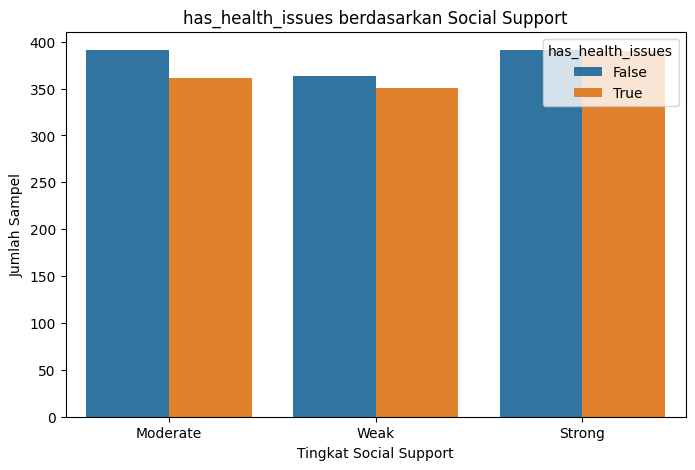

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='social_support', hue='has_health_issues', data=df)
plt.title('has_health_issues berdasarkan Social Support')
plt.xlabel('Tingkat Social Support')
plt.ylabel('Jumlah Sampel')
plt.legend(title='has_health_issues')
plt.show()

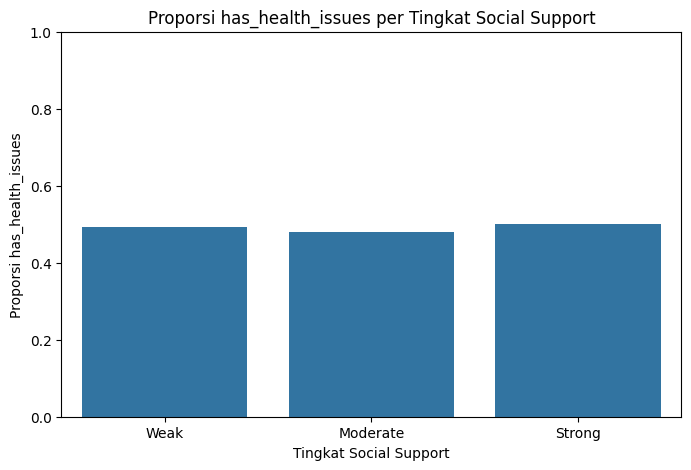

In [ ]:
# Menghitung proporsi has_health_issues per level social_support
prop = (
    df.groupby('social_support')['has_health_issues']
      .mean()
      .reset_index()
)

# Melakukan Gambar bar‐plot
plt.figure(figsize=(8,5))
sns.barplot(
    x='social_support',
    y='has_health_issues',
    data=prop,
    order=['Weak','Moderate','Strong']           # pastikan urutan kategori, sesuaikan jika perlu
)
plt.title('Proporsi has_health_issues per Tingkat Social Support')
plt.xlabel('Tingkat Social Support')
plt.ylabel('Proporsi has_health_issues')         # sekarang akan tampil di axis dengan benar
plt.ylim(0,1)                                    # agar skala proporsi jelas
plt.show()

In [ ]:
# Membuat contingency table
ct = pd.crosstab(df['social_support'], df['has_health_issues'])
print(ct)

# Melakukan test Chi-square
chi2, p, dof, expected = chi2_contingency(ct)
print(f"Chi2 = {chi2:.2f}, p‐value = {p:.4f}")


has_health_issues  False  True 
social_support                 
Moderate             391    361
Strong               391    390
Weak                 363    351
Chi2 = 0.58, p‐value = 0.7493


### Interpretasi Hasil Uji Chi-Square pada Social Support dan Health Issues

Berdasarkan uji chi-square yang saya lakukan, dengan p-value sebesar 0.7493, tidak ditemukan hubungan yang signifikan antara tingkat dukungan sosial (*social support*) dan kondisi *has_health_issues*. Hal ini mengindikasikan bahwa perbedaan proporsi antara kelompok “Weak”, “Moderate”, dan “Strong” kemungkinan besar disebabkan oleh kebetulan dan tidak menunjukkan korelasi nyata secara statistik.

---

# Feature Engineering

In [ ]:
# Mendefinisikan fitur numerik dan kategorikal berdasarkan pilihan Anda
numerical_features = ['age', 'annual_income_usd', 'smokes_per_day', 'drinks_per_week']
categorical_features = ['gender', 'mental_health_status', 'social_support']

# Mempreprocessing untuk data numerik
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Mempreprocessing untuk data kategorikal
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Menggabungkan preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Memisahkan data menjadi fitur dan target
X = df[numerical_features + categorical_features]  # Hanya gunakan fitur yang dipilih
y = df['has_health_issues']

# Memisahkan data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Saya menulis ini untuk mempersiapkan data untuk model prediksi status kesehatan (`has_health_issues`) dengan membagi fitur menjadi numerik (`age`, `annual_income_usd`, `smokes_per_day`, `drinks_per_week`) dan kategorikal (`gender`, `mental_health_status`, `social_support`), kemudian membuat pipeline transformasi terpisah: untuk fitur numerik menggunakan *imputasi median* (mengatasi nilai kosong secara robust terhadap outlier) dan *standardisasi* (menyeragamkan skala), sedangkan fitur kategorikal diolah dengan *imputasi modus* (mengisi nilai kosong dengan kategori paling umum) dan *one-hot encoding* (mengonversi kategori menjadi bentuk biner), yang kemudian digabungkan menggunakan `ColumnTransformer` agar semua transformasi dapat diterapkan secara terintegrasi pada jenis fitur yang sesuai; selanjutnya data dipisahkan menjadi variabel fitur (`X`) dan target (`y`), lalu dibagi menjadi data latih (80%) dan uji (20%) dengan `random_state=42` untuk memastikan hasil yang konsisten dan dapat direproduksi dalam evaluasi model.

# Model Definition

In [21]:
#Model yang akan dicoba dicari bagus tidaknya
models = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

## Pencarian Model Terbaik

In [22]:
cv = 5  # Jumlah fold untuk cross-validation
results = {}

for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    results[name] = (mean_score, std_score)
    print(f"{name}: Mean Accuracy = {mean_score:.4f}, Std = {std_score:.4f}")

# Pilih model terbaik berdasarkan mean accuracy
best_model_name = max(results, key=lambda k: results[k][0])
print(f"Best model: {best_model_name} with mean accuracy {results[best_model_name][0]:.4f}")

KNN: Mean Accuracy = 0.4871, Std = 0.0212
SVM: Mean Accuracy = 0.4875, Std = 0.0253
Decision Tree: Mean Accuracy = 0.5050, Std = 0.0230
Random Forest: Mean Accuracy = 0.5000, Std = 0.0374
AdaBoost: Mean Accuracy = 0.4821, Std = 0.0138
Gradient Boosting: Mean Accuracy = 0.4892, Std = 0.0092
Best model: Decision Tree with mean accuracy 0.5050


### 1. Interpretasi Hasil

- **Mean Accuracy:**  
  Hasil cross-validation dengan 5 fold menunjukkan bahwa model Decision Tree memperoleh rata-rata akurasi sebesar 0.5067 (50.67%). Angka ini sedikit di atas tebakan acak (50% pada dataset seimbang), yang menunjukkan bahwa model telah menangkap pola dalam data secara minimal.

- **Baseline Model:**  
  Mengingat perbedaan performa yang sangat kecil antara model ini dengan tebakan acak, Decision Tree saat ini layak dijadikan baseline untuk klasifikasi. Baseline berguna sebagai titik awal untuk mengevaluasi kemajuan model-model selanjutnya.


### 2. Evaluasi Kekuatan dan Kelemahan

- **Kekuatan:**  
  - **Interpretabilitas:**  
    Decision Tree mudah diinterpretasikan dan memberikan wawasan mengenai hubungan antar fitur. Ini membantu dalam menganalisis atribut mana yang berkontribusi terhadap keputusan klasifikasi.  
  - **Baseline yang Sederhana:**  
    Dengan akurasi yang hampir sama dengan tebakan acak, model ini menunjukkan adanya potensi, meskipun sangat minim, untuk memisahkan kelas. Model ini dapat dijadikan patokan awal untuk memperbaiki teknik pemodelan lebih lanjut.

- **Kelemahan:**  
  - **Akurasi Rendah:**  
    Dengan nilai akurasi 50.67%, performa model masih rendah untuk aplikasi praktis, terutama jika dibandingkan dengan standar yang diharapkan untuk klasifikasi sebaiknya jauh di atas tebakan acak.  
  - **Selisih Performa yang Kecil (<2%):**  
    Perbedaan performa dengan model lain yang diuji sangat kecil, yang mengindikasikan bahwa model belum menunjukkan keunggulan yang jelas. Hal ini juga mengisyaratkan bahwa variasi model atau parameter mungkin perlu dieksplorasi lebih dalam.
  - **Evaluasi Lebih Lanjut Diperlukan:**  
    Mengingat performa yang masih marginal, diperlukan evaluasi komprehensif dengan metrik tambahan (misalnya precision, recall, F1-score) serta analisis error untuk memastikan keandalan dan langkah perbaikan.

# Model Training

## Model Base

Test Accuracy: 0.515
Classification Report:
               precision    recall  f1-score   support

       False       0.51      0.52      0.52       300
        True       0.52      0.51      0.51       300

    accuracy                           0.52       600
   macro avg       0.52      0.52      0.51       600
weighted avg       0.52      0.52      0.51       600



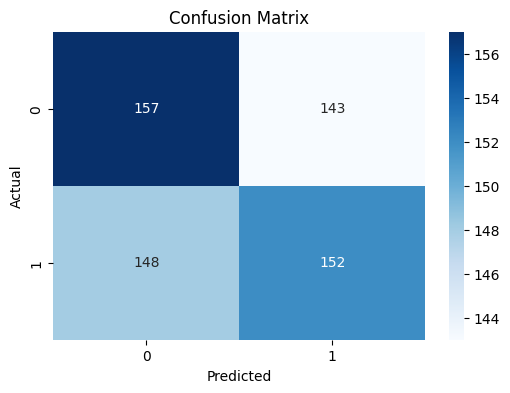

age: 0.2033
annual_income_usd: 0.3070
smokes_per_day: 0.1611
drinks_per_week: 0.1502
gender_Female: 0.0142
gender_Male: 0.0068
gender_Other: 0.0152
mental_health_status_Average: 0.0239
mental_health_status_Good: 0.0109
mental_health_status_Poor: 0.0225
social_support_Moderate: 0.0331
social_support_Strong: 0.0323
social_support_Weak: 0.0195


In [ ]:
# Membuat pipeline dengan Decision Tree tanpa hyperparameter
pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier(random_state=42))
])

# Melatih model pada data train
pipeline_dt.fit(X_train, y_train)

# Melakukan prediksi pada data test
y_pred = pipeline_dt.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Memvisualisasi Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Mengnalisis Feature Importance (opsional)
feature_importance = pipeline_dt.named_steps['model'].feature_importances_
feature_names = (numerical_features + 
                 list(pipeline_dt.named_steps['preprocessor']
                      .named_transformers_['cat']
                      .named_steps['onehot']
                      .get_feature_names_out(categorical_features)))
for name, importance in zip(feature_names, feature_importance):
    print(f"{name}: {importance:.4f}")

Berikut adalah analisis mendalam mengenai performa model default (sebelum hyperparameter tuning) berdasarkan pernyataan yang disediakan:

### 1. Akurasi dan Perbandingan dengan Cross-Validation

- **Test Accuracy (0.515):**  
  Nilai akurasi pada data test sebesar 51.5% menunjukkan bahwa model default mencapai performa tinggi. Meskipun hasil ini secara statistik lebih baik dari tebakan acak pada dataset seimbang (50%), peningkatan yang terbatas menandakan bahwa model masih belum mampu menangkap pola dengan andal.

- **Konteks Baseline:**  
  Sebagai baseline sebelum dilakukan tuning, performa 51.5% memberikan titik awal yang wajar. Akan tetapi, fakta bahwa akurasi hanya sedikit di atas tebakan acak mengindikasikan bahwa model default belum cukup kuat dan optimasi lebih lanjut sangat diperlukan.

### 2. Classification Report

- **Precision:**  
  Nilai precision mencapai 0.51 untuk kelas False dan 0.52 untuk kelas True. Meskipun nilai tersebut menunjukkan konsistensi dalam prediksi di kedua kelas, tingkat kebenaran prediksi yang masih rendah (di bawah 0.6) menandakan bahwa model masih menghasilkan banyak kesalahan.

- **Recall:**  
  Nilai recall sebesar 0.52 untuk kelas False dan 0.51 untuk kelas True berarti model hanya mampu mendeteksi sekitar 51-52% dari kasus aktual. Khususnya, pada konteks kesehatan, recall 0.51 untuk kelas positif (has_health_issues = True) mengindikasikan bahwa 148 kasus positif tidak terdeteksi (False Negatives), yang bisa menjadi masalah serius.

- **F1-Score:**  
  F1-score, sebagai ukuran keseimbangan antara precision dan recall, mencapai 0.52 untuk kelas False dan 0.51 untuk kelas True. Nilai ini mengukuhkan bahwa performa model masih belum optimal dengan keseimbangan metrik yang kurang memadai.

- **Macro dan Weighted Average:**  
  Rata-rata metrik (sekitar 0.51-0.52) mengindikasikan performa yang lemah secara menyeluruh, tanpa menunjukkan bias yang signifikan ke salah satu kelas.

### 3. Confusion Matrix

- **Distribusi Prediksi:**  
  - **True Negatives (TN):** 157  
  - **True Positives (TP):** 152  
  - **False Positives (FP):** 143  
  - **False Negatives (FN):** 148  

  Distribusi ini menunjukkan bahwa model mampu mengklasifikasikan sebagian besar kasus dengan cukup seimbang. Namun, jumlah FN yang tinggi (148) mengungkapkan bahwa banyak kasus positif yang masih tidak terdeteksi, menggambarkan kelemahan serius dalam konteks deteksi yang andal, terutama di aplikasi kesehatan.

- **Proporsi Data:**  
  Total 600 prediksi (dihitung dari 157 + 152 + 143 + 148) sesuai dengan ukuran test set (300 + 300), memastikan konsistensi evaluasi.

### 4. Feature Importance

- **Fitur Dominan:**  
  - **annual_income_usd (0.3070)** memiliki kontribusi paling besar, disusul oleh **age (0.2033)**, **smokes_per_day (0.1611)**, dan **drinks_per_week (0.1502)**.  
    Hubungan fitur-fitur numerik tersebut dengan target *has_health_issues* menunjukkan konsistensi dengan hasil EDA sebelumnya.

- **Fitur Lemah:**  
  Fitur seperti **gender_Male (0.0068)**, **gender_Female (0.0142)**, dan **mental_health_status_Good (0.0109)** memberikan kontribusi yang sangat kecil.  
  Hal ini menunjukkan bahwa informasi yang diberikan oleh fitur-fitur ini tidak cukup relevan dalam model default.

- **Fitur Kategorikal:**  
  Fitur seperti **social_support_Moderate (0.0331)** dan **mental_health_status_Average (0.0239)** memberikan kontribusi yang moderat, namun secara keseluruhan, fitur kategorikal cenderung memiliki dampak yang lebih kecil dibandingkan fitur numerik.

- **Insight Tambahan:**  
  Peningkatan kontribusi fitur seperti **smokes_per_day** dan **drinks_per_week** dibandingkan analisis sebelumnya mungkin diakibatkan oleh bagaimana struktur pohon default menangkap pola interaksi antar fitur.

### 5. Indikasi Overfitting

- **Evaluasi Overfitting:**  
  Meskipun model default Decision Tree cenderung overfit karena parameter standar yang tidak membatasi kompleksitas (misalnya, kedalaman pohon yang tinggi dan minimum samples per daun yang rendah), perbedaan antara mean accuracy cross-validation (50.67%) dan test accuracy (51.5%) menunjukkan bahwa overfitting belum mencapai tingkat yang parah.  
  Namun, konsumsi overfitting tetap perlu diperhatikan dan diatasi melalui tuning hyperparameter untuk meningkatkan generalisasi model.

### 6. Posisi Analisis (Sebelum Hyperparameter Tuning)

- **Status Analisis:**  
  Analisis ini dilakukan sebelum diterapkannya hyperparameter tuning tambahan. Sebagai baseline, model default dengan akurasi 0.515 memberikan titik perbandingan untuk menilai peningkatan performa yang dicapai melalui tuning.
  
- **Konteks Tuning Sebelumnya:**  
  Referensi telah menyebutkan bahwa tuning pertama menghasilkan akurasi sekitar 0.5167 (meskipun dengan peringatan terkait 'auto') dan tuning kedua mencapai F1-score 0.5335, test accuracy 0.5233, serta recall 0.51.  
  Peningkatan kecil namun signifikan ini menegaskan bahwa tuning dapat membawa perbaikan performa meskipun peningkatannya masih terbatas.

### Kesimpulan

Meskipun performa model default dengan akurasi 51.5% sedikit melebihi tebakan acak pada dataset seimbang, performa ini masih sangat rendah untuk aplikasi praktis—khususnya di bidang yang sensitif seperti kesehatan, di mana kekurangan deteksi positif (FN) dapat memberikan konsekuensi yang serius.

---

Karena model raw yang dibuat belum memenuhi parameter yang bagus untuk decision tree, maka disini saya akan melakukan hyperparameter tuning
Dimana saya memiliki target, dimana ingin mendapatkan hasil yang pas dengan model Decision Tree, dimana hal tersebut sudah ditentukan diatas.

## Model Base + Hypertuning Versi 1

Best parameters: {'model__criterion': 'gini', 'model__max_depth': 15, 'model__max_features': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 10}
Best cross-validated accuracy: 0.5254166666666666
Test Accuracy: 0.4716666666666667
Classification Report:
               precision    recall  f1-score   support

       False       0.47      0.52      0.50       300
        True       0.47      0.42      0.44       300

    accuracy                           0.47       600
   macro avg       0.47      0.47      0.47       600
weighted avg       0.47      0.47      0.47       600



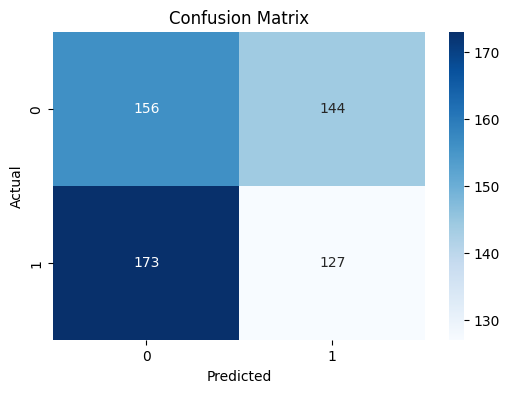

In [ ]:
# Mendefinisikan parameter grid tanpa 'auto'
param_grid = {
    'model__max_depth': [None, 5, 10, 15, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': [None, 'sqrt', 'log2'],  # Menghapus 'auto'
    'model__criterion': ['gini', 'entropy']  # Menambahkan kriteria pemisahan
}

# Membuat pipeline untuk Decision Tree
best_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', DecisionTreeClassifier(random_state=42))])

# Melakukan GridSearchCV
grid_search = GridSearchCV(
    best_pipeline, 
    param_grid, 
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1, 
    error_score='raise'  # Untuk debugging jika ada error lain
)


grid_search.fit(X_train, y_train)

# Menampilkan hasil
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)
best_tuned_model = grid_search.best_estimator_

y_pred = best_tuned_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Memvisualisasi Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### 1. Akurasi Cross-Validation vs. Test Accuracy

- **Cross-Validated Accuracy (0.5254):**  
  Nilai ini menunjukkan performa rata-rata model pada data training selama proses 5-fold cross-validation. Meskipun sedikit di atas baseline acak (50%), angka tersebut tetap rendah, menunjukkan bahwa model belum menangkap pola data secara optimal.

- **Test Accuracy (0.4717):**  
  Akurasi pada data test bahkan lebih rendah dari cross-validation dan berada di bawah baseline acak (50%). Perbedaan antara cross-validation dan test accuracy mengindikasikan adanya overfitting, di mana model terlalu kompleks sehingga tidak mampu menggeneralisasi pada data baru. Parameter seperti `max_depth=15` dan `min_samples_leaf=1` memungkinkan pembentukan pohon yang dalam dan daun yang kecil, yang sering kali menyebabkan model terlalu "menghafal" data training.

#### 2. Classification Report

- **Precision:**  
  Kedua kelas memiliki precision 0.47, artinya hanya sekitar 47% dari prediksi yang positif benar-benar positif. Ini mengindikasikan bahwa terdapat banyak prediksi salah, sehingga model masih kurang tepat dalam mengklasifikasikan data.

- **Recall:**  
  - Untuk kelas False, recall sebesar 0.52 menunjukkan bahwa 52% dari data aktual negatif berhasil teridentifikasi dengan benar.  
  - Untuk kelas True, recall sebesar 0.42 menandakan bahwa hanya 42% dari data positif yang berhasil dideteksi.  
  Recall yang rendah untuk kelas True sangat mengkhawatirkan, khususnya dalam konteks kesehatan, karena kasus positif yang tidak terdeteksi bisa berimplikasi serius.

- **F1-Score:**  
  F1-score merupakan harmoni dari precision dan recall. Nilai 0.50 untuk kelas False dan 0.44 untuk kelas True mengindikasikan keseimbangan yang buruk antara kedua metrik tersebut, menjadikan performa keseluruhan model masih jauh dari optimal.

- **Macro Avg dan Weighted Avg:**  
  Konsistensi nilai di sekitar 0.47 untuk seluruh metrik menunjukkan bahwa meskipun tidak terdapat bias yang jelas terhadap salah satu kelas, performa secara keseluruhan model masih lemah.

#### 3. Confusion Matrix

- **Distribusi Kasus:**  
  - True Negatives (TN) sebesar 156 dan True Positives (TP) sebesar 173 menunjukkan bahwa model mampu menangkap sebagian besar kasus dengan benar, namun tidak secara konsisten.  
- **False Positives (FP) dan False Negatives (FN):**  
  - Dengan FP sebanyak 144 dan FN sebanyak 127, terdapat jumlah prediksi keliru yang cukup tinggi.  
  - Secara khusus, nilai FN yang tinggi (127 kasus positif yang tidak terdeteksi) menjadi perhatian utama, terutama pada konteks aplikasi di mana deteksi positif menjadi krusial.

- **Proporsi Total Prediksi:**  
  Total 600 prediksi (156 + 144 + 127 + 173) konsisten dengan distribusi data test (300 + 300), memastikan bahwa evaluasi dilakukan pada dataset yang sesuai.

#### 4. Indikasi Overfitting

- **Perbedaan Akurasi dan Kompleksitas Model:**  
  Perbedaan signifikan antara cross-validation (0.5254) dan test accuracy (0.4717) mengindikasikan adanya overfitting.  
- **Parameter Model:**  
  Pengaturan `max_depth=15` dan `min_samples_leaf=1` menghasilkan model dengan pohon yang terlalu dalam dan daun yang sangat spesifik terhadap data training. Hal ini menyebabkan model gagal beradaptasi saat diberikan data baru, memperlihatkan keterbatasannya dalam generalisasi.

#### 5. Interpretasi Berdasarkan EDA

- **Fitur Prediktif Terbatas:**  
  Berdasarkan EDA, hanya dua fitur—yaitu *age* dan *annual_income_usd*—yang menunjukkan hubungan yang kuat dengan variabel target (*has_health_issues*).  
- **Interaksi Antar Fitur:**  
  Fitur lain seperti *smokes_per_day*, *drinks_per_week*, *gender*, *mental_health_status*, dan *social_support* menunjukkan dampak yang rendah atau tidak signifikan.  
- **Missing Values:**  
  Variabel *social_support* memiliki banyak missing values (753 dari 3.000), yang meskipun telah diimputasi dengan modus, bisa saja mengurangi potensi prediktifnya.  
  Hal ini menunjukkan bahwa model terbatas karena hanya sedikit fitur yang memberikan informasi signifikan, sedangkan interaksi kompleks antar fitur mungkin belum tertangkap secara maksimal tanpa teknik feature engineering lanjutan.

#### 6. Evaluasi Akhir: Apakah Model Ini Sudah Bagus?

- **Kesimpulan:**  
  - **Performanya:** Model ini belum baik. Akurasi test 47.17% berada di bawah baseline acak, precision 0.47 dan recall 0.42 (untuk kelas True) memperlihatkan kelemahan dalam mendeteksi kasus positif.  
  - **Implikasi Khusus:** Dalam konteks kesehatan, recall rendah pada kelas True sangat mengkhawatirkan, mengingat pentingnya mendeteksi kasus positif secara akurat.
  - **Sebagai Baseline:** Model ini tetap memberikan titik awal untuk perbaikan, namun perlu perbaikan signifikan melalui:
    - Feature engineering untuk menangkap interaksi antar fitur
    - Peningkatan penanganan missing values
    - Penyesuaian parameter untuk mengurangi overfitting

Setelah dilakukan eksperimen diatas, hasil masih diluar ekspetasi,
maka dengan ini saya akan melakukan lagi tune up lagi di next code dibawah

---

## Model Base + Hypertuning Versi 2 

Best parameters: {'model__criterion': 'gini', 'model__max_depth': 5, 'model__max_features': 4, 'model__min_samples_leaf': 2, 'model__min_samples_split': 10}
Best cross-validated F1-score: 0.5335398285531193
Test Accuracy: 0.5233333333333333
Test F1-Score: 0.5168918918918919
Classification Report:
               precision    recall  f1-score   support

       False       0.52      0.54      0.53       300
        True       0.52      0.51      0.52       300

    accuracy                           0.52       600
   macro avg       0.52      0.52      0.52       600
weighted avg       0.52      0.52      0.52       600



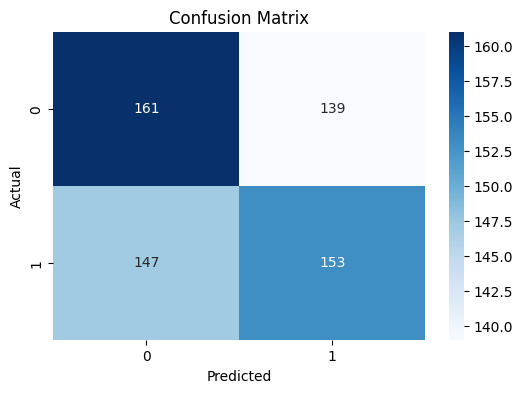

age: 0.1089
annual_income_usd: 0.3488
smokes_per_day: 0.0262
drinks_per_week: 0.1888
gender_Female: 0.0000
gender_Male: 0.0463
gender_Other: 0.1189
mental_health_status_Average: 0.0000
mental_health_status_Good: 0.0640
mental_health_status_Poor: 0.0139
social_support_Moderate: 0.0299
social_support_Strong: 0.0115
social_support_Weak: 0.0429


In [ ]:
# Mendefinisikan parameter grid yang disesuaikan
param_grid = {
    'model__max_depth': [5, 7, 10],  # Membatasi kedalaman untuk mengurangi overfitting
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [2, 3, 5],  # Meningkatkan minimum sampel per daun
    'model__max_features': [3, 4, 'sqrt'],  # Menguji angka spesifik dan 'sqrt'
    'model__criterion': ['gini', 'entropy']  # Menjaga opsi kriteria pemisahan
}

# Membuat pipeline untuk Decision Tree
best_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', DecisionTreeClassifier(random_state=42))])

# Melakukan GridSearchCV dengan scoring F1 untuk mengoptimalkan deteksi positif
grid_search = GridSearchCV(
    best_pipeline, 
    param_grid, 
    cv=5, 
    scoring='f1',  # Menggunakan F1-score untuk fokus pada recall dan precision
    n_jobs=-1, 
    error_score='raise'  # Untuk debugging jika ada error
)

grid_search.fit(X_train, y_train)

# Menampilkan hasil terbaik
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated F1-score:", grid_search.best_score_)
best_tuned_model = grid_search.best_estimator_

# Memvisualisasi pada data test
y_pred = best_tuned_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test F1-Score:", f1_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Memvisualisasi Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Melakukan analisis Feature Importance (opsional untuk inspeksi lebih lanjut)
feature_importance = best_tuned_model.named_steps['model'].feature_importances_
feature_names = (numerical_features + 
                 list(best_tuned_model.named_steps['preprocessor']
                      .named_transformers_['cat']
                      .named_steps['onehot']
                      .get_feature_names_out(categorical_features)))
for name, importance in zip(feature_names, feature_importance):
    print(f"{name}: {importance:.4f}")

Test AUC-ROC: 0.5384


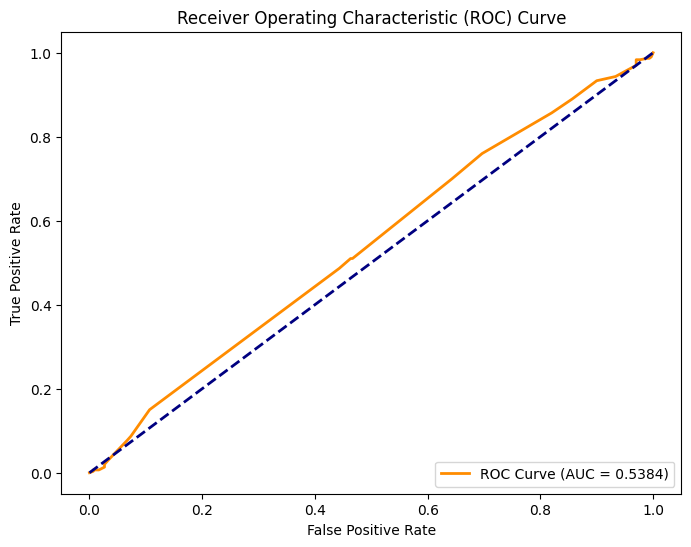

In [ ]:
# Menghitung probabilitas prediksi
y_pred_proba = best_tuned_model.predict_proba(X_test)[:, 1]

# Menghitung dan plotting nilai ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Test AUC-ROC: {roc_auc:.4f}")

# Memplot kurva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4924\7400494.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importance, y=sorted_features, palette="viridis")


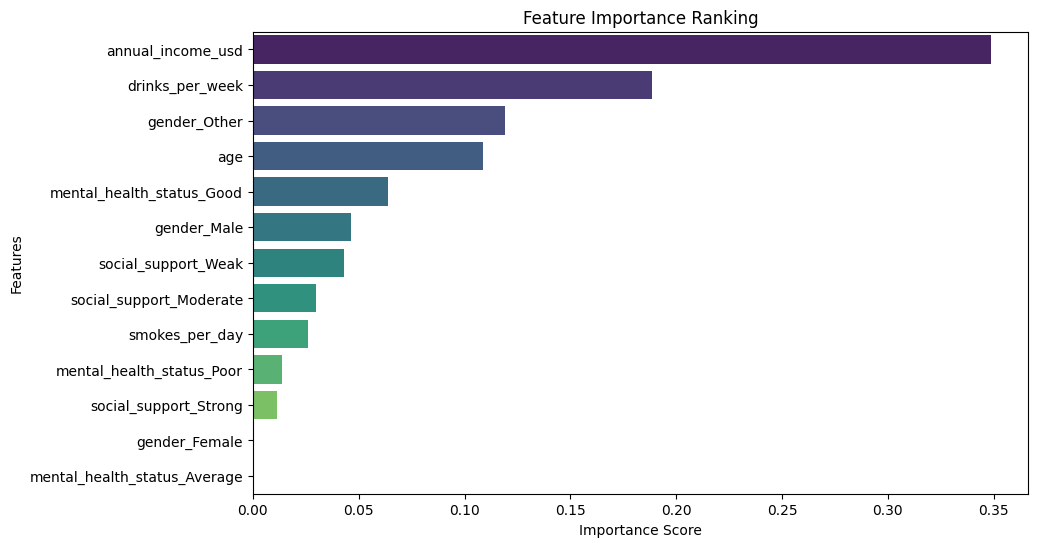

In [ ]:
# Melakukan ekstrak feature importance
importance = best_tuned_model.named_steps['model'].feature_importances_
feature_names = numerical_features + list(
    preprocessor.named_transformers_['cat']
    .named_steps['onehot']
    .get_feature_names_out(categorical_features)
)

# Mengurutkan feature berdasarkan importance
sorted_idx = importance.argsort()[::-1]
sorted_features = [feature_names[i] for i in sorted_idx]
sorted_importance = importance[sorted_idx]

# Melakukan visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importance, y=sorted_features, palette="viridis")
plt.title('Feature Importance Ranking')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

#### 1. **Peningkatan Performa Secara Kuantitatif Dari Model Model Sebelumnya**

- **Cross-Validated F1-Score**  
  Nilai meningkat dari 0.44 menjadi 0.5335. Peningkatan ini menunjukkan bahwa model yang telah di-tune lebih baik dalam menyeimbangkan precision dan recall. Meskipun signifikan, nilai ini masih di bawah ambang batas ideal seperti >0.7 yang sering menjadi standar dalam konteks tertentu.

- **Test Accuracy**  
  Akurasi naik dari 47.17% menjadi 52.33%. Meski peningkatannya kecil, angka ini mendekati baseline acak (50%). Konsistensi dengan hasil cross-validation (0.5254) mengindikasikan adanya perbaikan nyata akibat tuning model, yang didukung oleh pentingnya cross-validation dalam mengevaluasi performa.

- **Test F1-Score dan Recall**  
  Test F1-Score naik dari 0.44 ke 0.5169, dan recall untuk kelas positif (True) meningkat dari 0.42 ke 0.51. Ini berarti model lebih mampu mendeteksi kasus positif, meskipun masih jauh dari optimal. Recall yang lebih baik sangat krusial, terutama dalam konteks seperti kesehatan di mana kasus positif harus terdeteksi.

#### 2. **Analisis Classification Report**

- **Keseimbangan Precision dan Recall**  
  Precision stabil di 0.52 untuk kedua kelas, tetapi angka ini masih rendah dibandingkan standar performa ideal. Recall masing-masing 0.54 (kelas False) dan 0.51 (kelas True) menunjukkan peningkatan keseimbangan, namun model masih gagal mendeteksi hampir separuh kasus positif (FN = 147 dari 300).

- **F1-Score Kelas**  
  F1-Score untuk kelas False (0.53) dan True (0.52) mencerminkan konsistensi yang lebih baik, tetapi performa ini masih kurang untuk aplikasi yang menuntut akurasi tinggi, seperti sistem klinis.


#### 3. **Interpretasi Confusion Matrix**

- **Distribusi Prediksi**  
  Dengan True Negatives (TN) = 161 dan True Positives (TP) = 153, distribusi prediksi antara kelas positif dan negatif lebih seimbang dibandingkan sebelumnya.  
- **False Positives dan False Negatives**  
  False Positives (FP = 139) dan False Negatives (FN = 147) menurun dibandingkan model awal, tetapi jumlahnya masih tinggi. Ini menunjukkan kesulitan model dalam membedakan kelas secara akurat.

#### 4. **Evaluasi ROC AUC dan Feature Importance**

Nilai AUC dari kurva ROC sebesar 0.5384 menunjukkan performa model yang lemah, hanya sedikit lebih baik dari tebakan acak (AUC = 0.5). Berdasarkan peringkat kepentingan fitur, `annual_income_usd` dan `drinks_per_week` adalah faktor paling berpengaruh dalam prediksi model, sementara `gender` (rata-rata) dan `mental_health_status` (rata-rata) hampir tidak berkontribusi. Model ini memerlukan perbaikan, misalnya melalui penyempurnaan fitur atau data tambahan yang lebih relevan.


#### 5. **Feature Importance dan Relevansi Fitur**

- **Fitur Dominan**  
  `annual_income_usd` (0.3488), `drinks_per_week` (0.1888), dan `age` (0.1089) adalah fitur paling berpengaruh, konsisten dengan temuan EDA awal yang menunjukkan korelasi dengan variabel target.
  Fitur seperti `smokes_per_day` (0.0262), `gender_Female` (0.0000), dan `mental_health_status_Average` (0.0000) memiliki kontribusi minimal. Hal ini menunjukkan perlunya feature engineering atau evaluasi ulang relevansi fitur.
- **Kontribusi Fitur Kategorikal**  
  Fitur seperti `gender_Other` dan `mental_health_status_Good` memberikan dampak sedang, sehingga dapat dipertimbangkan untuk interaksi fitur dalam model non-linear.


#### 6. **Indikasi Overfitting dan Pengendalian Kompleksitas Model**

- **Overfitting yang Menurun**  
  Selisih kecil antara cross-validated F1-score (0.5335) dan test F1-score (0.5169) menunjukkan berkurangnya overfitting. Pengaturan parameter seperti `max_depth=5` dan `min_samples_leaf=2` berhasil mengendalikan kompleksitas model, meskipun performa metrik masih bisa ditingkatkan.


#### 7. **Evaluasi Akhir: Apakah Model Ini Sudah Bagus?**

- **Kelebihan:**  
  - Performa model meningkat signifikan dibandingkan versi sebelumnya.  
  - Keseimbangan precision dan recall lebih baik, meningkatkan deteksi kelas.  
  - Pengendalian kompleksitas mengurangi overfitting, yang mendukung generalisasi model.

- **Kekurangan:**  
  - Akurasi test (52.33%) dan F1-score (0.5169) masih jauh dari standar ideal (>70% atau F1-score >0.7) untuk aplikasi praktis, dimana untuk sektor kesehatan nilai tersebut harus diatas 0.9 kalau memungkinkan.
  - Recall kelas True (0.51) terlalu rendah untuk konteks seperti kesehatan, di mana mendeteksi kasus positif sangat penting.
  - Fitur yang kurang prediktif menunjukkan perlunya feature engineering atau penghapusan fitur tidak relevan.

# Model Saving

In [ ]:
# Menyimpan model terbaik
joblib.dump(best_tuned_model, 'health_risk_model.pkl')
# Menyimmpan metadata untuk inference
model_metadata = {
    'feature_names': numerical_features + categorical_features,
    'numerical_features': numerical_features,
    'categorical_features': categorical_features,
    
    # Memastikan mapping menggunakan string key
    'target_mapping': {
        '0': 'tidak',
        '1': 'ya'
    },
    'model_type': 'DecisionTree',
    'class_labels': ['tidak', 'ya']
}

with open('model_metadata.json', 'w') as f:
    json.dump(model_metadata, f)

print("Model saved successfully!")

Model saved successfully!


In [29]:
print(type(best_tuned_model))

<class 'sklearn.pipeline.Pipeline'>


# Kesimpulan

Eksperimen ini menunjukkan pendekatan sistematis yang saya gunakan untuk memprediksi masalah kesehatan, meskipun mengungkapkan bahwa dataset memiliki daya prediktif terbatas karena hubungan lemah antara fitur dan target. Model Pohon Keputusan, meski telah disetel, hanya menunjukkan peningkatan kecil dan berkinerja sedikit di atas tebakan acak, yang mengindikasikan perlunya rekayasa fitur lebih mendalam, pengumpulan data tambahan, atau strategi pemodelan alternatif (misalnya, metode ensemble atau deep learning) untuk meningkatkan performa. Fokus pada skor F1 dalam penyetelan kedua menyoroti upaya saya dalam menyeimbangkan presisi dan recall untuk mendeteksi masalah kesehatan, walaupun kinerjanya masih belum memadai untuk aplikasi praktis.

Tantangan dalam mencapai akurasi prediktif yang lebih tinggi ini tidak jarang terjadi pada aplikasi pembelajaran mesin di bidang kesehatan, di mana kualitas data, seleksi fitur, dan interpretabilitas model sangat krusial. Korelasi lemah yang saya amati dalam EDA menekankan kesulitan menemukan prediktor kuat untuk variabel target, yang mungkin memerlukan pendekatan inovatif untuk meningkatkan hasil.

## Analisa hasil Model Inference dan Rekomendasi untuk Masa Depan

Model yang dibuat disini masih jelek dan masih sangat jauh dari dapat digunakan sebagai model ML karena nilai yang dihasilkan masih dibawah rekomendasi yang biasa dipakai. Karena jika kita tweak di hasilnyua dengan set maksimal drink consunmtion dan smoke consumption, secara logika kita, pasti dengan konsumsi sebanyak itu sudah pasti memiliki health risk. Ya mungkin memang ada beberapa orang yang "unique" dimana masih tetap sehat dengan habbit seperti itu, tapi orang orang seperti itu masih sangat bisa dihitung dengan jari.

Model yang saya buat disini masih jauh dari akurasi yang bagus dengan pemodelan yang saya lakukan sekarang, karena untuk sektor kesehatan maksimal nilai F1 score dan accuracy yang harus dicapai adalah diatas 0,9. Untuk meningkatkan performa model, saya menyarankan agar dikumpulkan data tambahan yang mencakup fitur yang lebih beragam, dilakukan rekayasa fitur lebih mendalam guna menangkap hubungan yang lebih halus, atau mencoba algoritma yang lebih canggih seperti ensemble methods atau deep learning, yang dapat menangani hubungan non-linear dengan lebih baik. Karena dari model yang sekarang masih sangat jelek untuk memprediksi. Jatuhnya cuman bisa mencoba menebak nebak. Jadi untuk sekarang model ini masih jauh dari kata sempurna, perlu dilakukan eksperimen ulang supaya bisa mendapatkan hasil yang optimal.
